In [31]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sns

In [32]:
# 데이터셋 인스턴스 생성
data = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv')

In [33]:
data.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [34]:
data.isnull().sum()

,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0


In [35]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [36]:
target_column = 'Blood_Pressure_Abnormality'
feature_columns = data.columns.drop(target_column).tolist()

In [37]:
# 수치형 컬럼 중앙값으로 채우기
data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].median(), inplace=True)
data['alcohol_consumption_per_day'].fillna(data['alcohol_consumption_per_day'].median(), inplace=True)

# Pregnancy 컬럼 0으로 채우기
data['Pregnancy'].fillna(0, inplace=True)

# Patient_Number 제거
if 'Patient_Number' in data.columns:
    data = data.drop('Patient_Number', axis=1)

target_column = 'Blood_Pressure_Abnormality'
# feature_columns 리스트를 data.columns에서 다시 정의 (Patient_Number 제외)
feature_columns = data.columns.drop(target_column).tolist()

<ipython-input-37-1aee7c6df128>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].median(), inplace=True)
<ipython-input-37-1aee7c6df128>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [38]:
data.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,250.0,2,1,1
1,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.0,2,0,0


In [39]:
data.isnull().sum()

,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,0
Age,0
BMI,0
Sex,0
Pregnancy,0
Smoking,0
Physical_activity,0
salt_content_in_the_diet,0


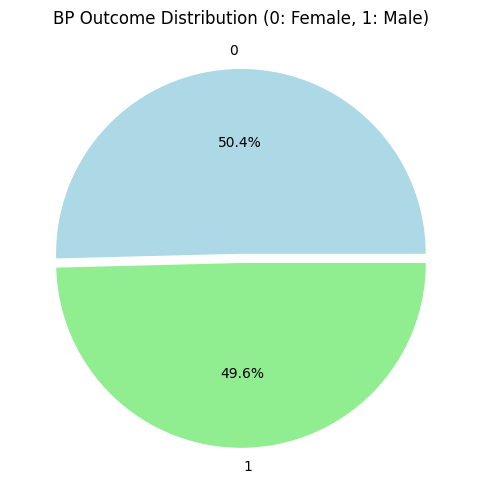

In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
data.Sex.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=['lightblue', 'lightgreen'], explode=(0.05, 0))
plt.title('BP Outcome Distribution (0: Female, 1: Male)')
plt.ylabel('')
plt.show()

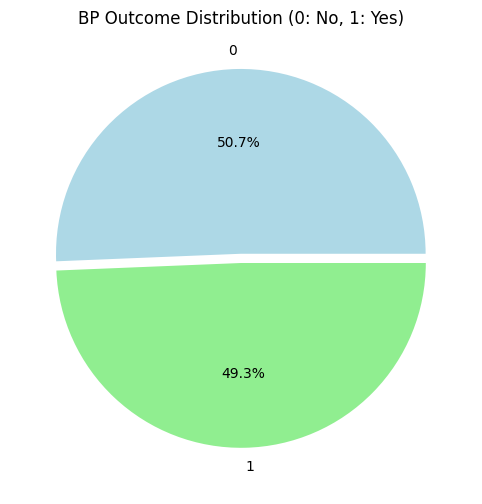

In [41]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
data.Blood_Pressure_Abnormality.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=['lightblue', 'lightgreen'], explode=(0.05, 0))
plt.title('BP Outcome Distribution (0: No, 1: Yes)')
plt.ylabel('')
plt.show()

<ipython-input-42-d9a2323ca448>:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Physical_activity_female, Physical_activity_male],


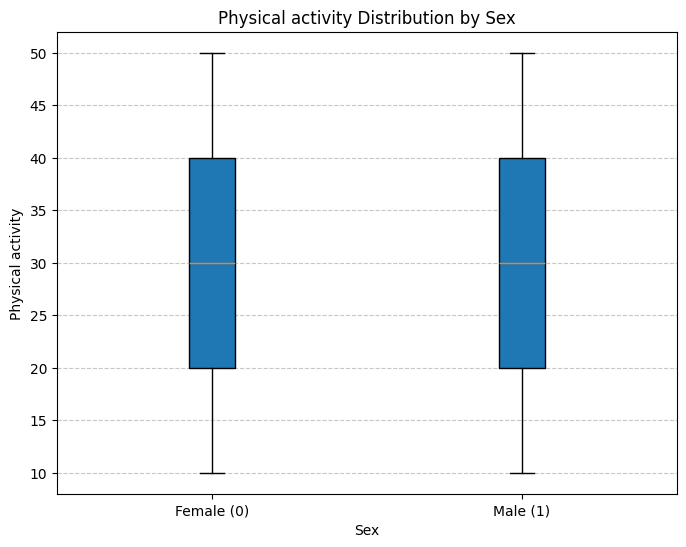

In [42]:
# Physical_activity 데이터 추출
Physical_activity = data['Physical_activity'].values # .values를 사용하여 NumPy 배열로 변환

sex_code_female = 0
sex_code_male = 1
Physical_activity_female = data[data['Sex'] == sex_code_female]['BMI'].dropna().values
Physical_activity_male = data[data['Sex'] == sex_code_male]['BMI'].dropna().values

# Box Plot 생성
plt.figure(figsize=(8, 6))
# 분리된 데이터를 리스트로 묶어 전달
plt.boxplot([Physical_activity_female, Physical_activity_male],
            patch_artist=True,
            showfliers=True,
            labels=[f'Female ({sex_code_female})', f'Male ({sex_code_male})']) # 각 박스에 대한 레이블 지정


# 그래프 제목 및 레이블 설정
plt.title('Physical activity Distribution by Sex')
plt.ylabel('Physical activity')
plt.xlabel('Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 보여주기
plt.show()

<ipython-input-43-481dca56a373>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='BMI', data=data, palette='pastel', # palette로 색상 지정


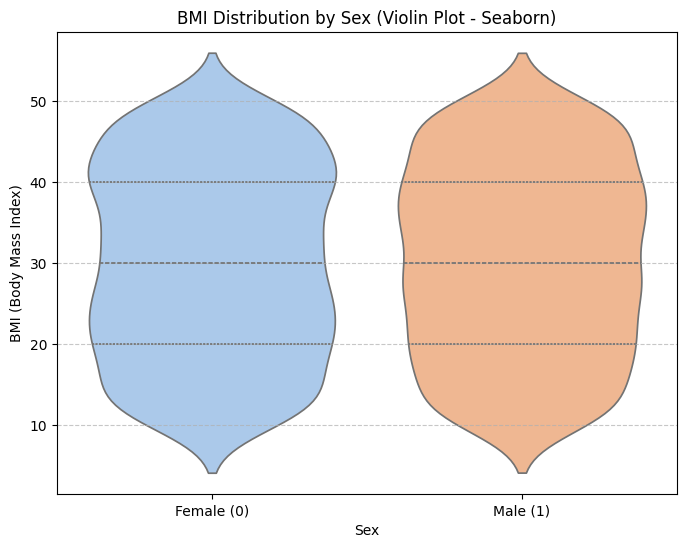

In [43]:
# --- Violin Plot (Seaborn) ---
plt.figure(figsize=(8, 6))

# sns.violinplot 사용 (x: 그룹 변수, y: 값 변수, data: 데이터프레임)
sns.violinplot(x='Sex', y='BMI', data=data, palette='pastel', # palette로 색상 지정
               inner='quartile') # inner 옵션: 'box', 'quartile', 'point', 'stick', None

# 그래프 제목 및 레이블 설정
plt.title('BMI Distribution by Sex (Violin Plot - Seaborn)')
plt.ylabel('BMI (Body Mass Index)')
plt.xlabel('Sex')
# x축 눈금 레이블 변경
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

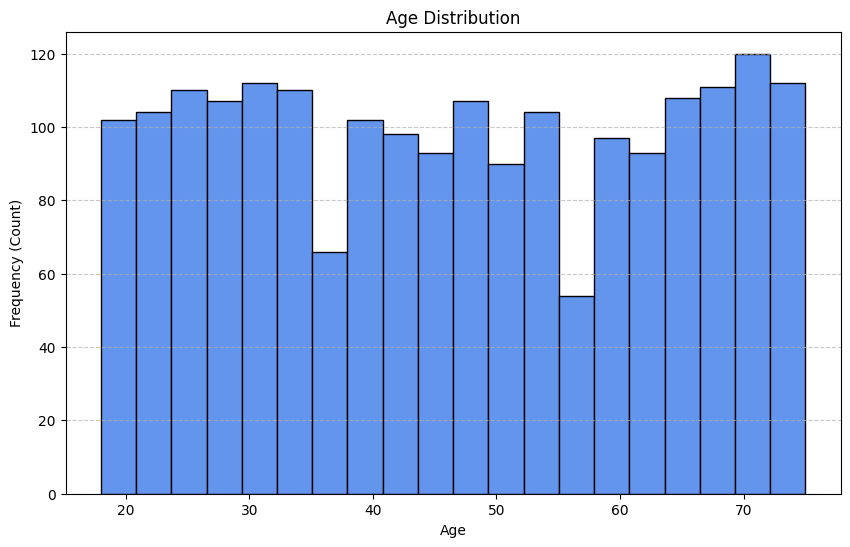

In [44]:
plt.figure(figsize=(10, 6)) # 그래프 크기 조절
age_data = data['Age'].dropna().values
plt.hist(age_data, bins=20, color='cornflowerblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드 추가
plt.show()

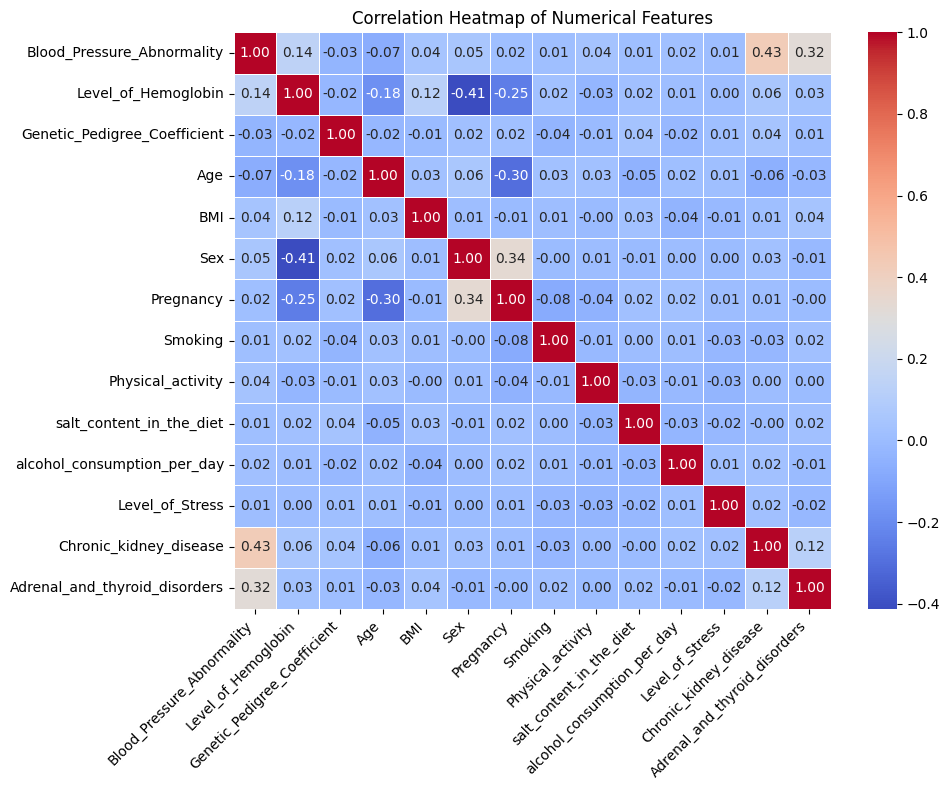

In [45]:
# --- Heatmap ---

# 상관관계를 계산할 수치형 컬럼 선택
numerical_cols = ['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']

# 상관관계 계산
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(10, 8))

# sns.heatmap 사용 (data: 상관관계 행렬)
sns.heatmap(correlation_matrix,
            annot=True,       # 각 셀에 값 표시
            cmap='coolwarm',  # 색상 맵
            fmt=".2f",        # 값 표시 형식 (소수점 둘째 자리)
            linewidths=.5)    # 셀 사이 경계선

# 그래프 제목 및 레이블 설정
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.yticks(rotation=0)
plt.tight_layout() # 레이아웃 자동 조절

plt.show()

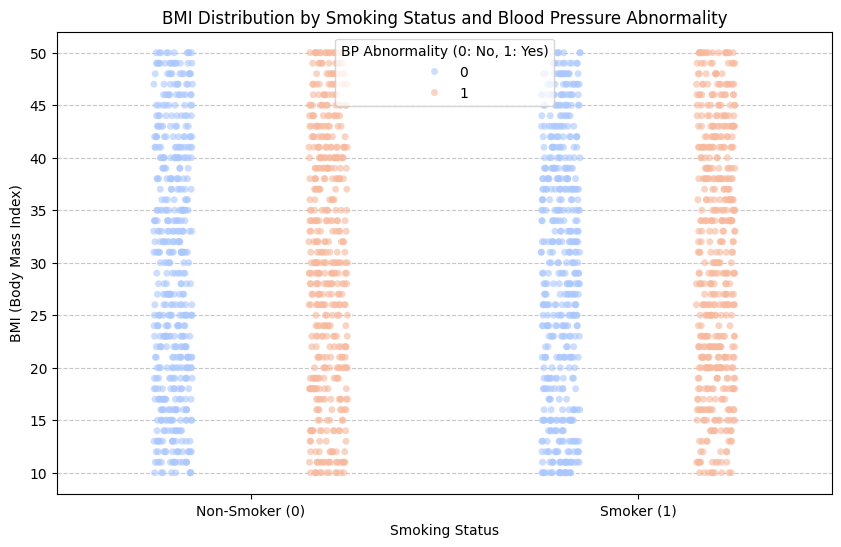

In [46]:
# Stripplot 생성
plt.figure(figsize=(10, 6)) # 그래프 크기 조절

# x축: Smoking (범주형), y축: BMI (연속형)
# hue: Blood_Pressure_Abnormality (색상으로 구분할 변수)
sns.stripplot(x='Smoking', y='BMI', hue='Blood_Pressure_Abnormality',
              data=data,
              jitter=True,    # 점들이 겹치지 않도록 약간 분산
              dodge=True,     # hue로 구분된 그룹을 옆으로 약간 분리
              palette='coolwarm', # 색상 팔레트 (예: coolwarm, Set1 등)
              alpha=0.6,      # 점 투명도
              s=5)            # 점 크기

# 그래프 제목 및 레이블 설정
plt.title('BMI Distribution by Smoking Status and Blood Pressure Abnormality')
plt.xlabel('Smoking Status')
plt.ylabel('BMI (Body Mass Index)')
# x축 눈금 레이블 변경 (0: 비흡연, 1: 흡연 가정 - 실제 데이터 확인 필요)
plt.xticks(ticks=[0, 1], labels=['Non-Smoker (0)', 'Smoker (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='BP Abnormality (0: No, 1: Yes)') # 범례 제목 설정

# 그래프 보여주기
plt.show()

In [47]:
# 데이터와 타겟 분리
X = data[feature_columns].values
y = data[target_column].values

In [48]:
# Split the dataset into training and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw) # Use transform only for test set

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

In [50]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [51]:
# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

# 모델 정의

In [53]:
class BPDense(nn.Module):
    def __init__(self):
        super(BPDense, self).__init__()
        self.fc1 = nn.Linear(13, 64)  # input features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 classes (0 or 1) in the dataset

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) # Output raw scores (logits)
        return x

# Initialize the model
dense_model = BPDense()

# 손실 함수 및 최적화 기법 정의

In [54]:
# CrossEntropyLoss 사용
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dense_model.parameters(), lr=0.001)

# 모델 학습 (Dense Network)

In [55]:
# Variables to store loss and accuracy
dense_train_losses = []
dense_test_accuracies = []
dense_all_labels_list = []
dense_all_predictions_list = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    dense_model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = dense_model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0) # Multiply by batch size

    # Calculate average loss over an epoch
    epoch_loss = running_loss / len(train_dataloader.dataset)
    dense_train_losses.append(epoch_loss)

    # Evaluate on test data
    dense_model.eval()
    correct = 0
    total = 0
    epoch_labels = []
    epoch_predictions = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = dense_model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            epoch_labels.extend(labels.cpu().numpy())
            epoch_predictions.extend(predicted.cpu().numpy())

    accuracy = 100 * correct / total
    dense_test_accuracies.append(accuracy)
    # Store labels/predictions from the *last* epoch for final evaluation
    if epoch == num_epochs - 1:
        dense_all_labels = np.array(epoch_labels)
        dense_all_predictions = np.array(epoch_predictions)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Dense Network Training complete.")

Epoch 1/50, Loss: 0.6541, Accuracy: 71.00%
Epoch 2/50, Loss: 0.5354, Accuracy: 72.75%
Epoch 3/50, Loss: 0.4920, Accuracy: 73.25%
Epoch 4/50, Loss: 0.4632, Accuracy: 76.25%
Epoch 5/50, Loss: 0.4332, Accuracy: 78.25%
Epoch 6/50, Loss: 0.3944, Accuracy: 81.50%
Epoch 7/50, Loss: 0.3586, Accuracy: 83.00%
Epoch 8/50, Loss: 0.3293, Accuracy: 85.00%
Epoch 9/50, Loss: 0.3054, Accuracy: 86.75%
Epoch 10/50, Loss: 0.2905, Accuracy: 84.50%
Epoch 11/50, Loss: 0.2801, Accuracy: 85.00%
Epoch 12/50, Loss: 0.2697, Accuracy: 85.25%
Epoch 13/50, Loss: 0.2619, Accuracy: 85.75%
Epoch 14/50, Loss: 0.2613, Accuracy: 85.00%
Epoch 15/50, Loss: 0.2487, Accuracy: 85.50%
Epoch 16/50, Loss: 0.2436, Accuracy: 84.75%
Epoch 17/50, Loss: 0.2423, Accuracy: 85.75%
Epoch 18/50, Loss: 0.2363, Accuracy: 85.50%
Epoch 19/50, Loss: 0.2326, Accuracy: 85.50%
Epoch 20/50, Loss: 0.2292, Accuracy: 85.00%
Epoch 21/50, Loss: 0.2258, Accuracy: 84.00%
Epoch 22/50, Loss: 0.2219, Accuracy: 85.25%
Epoch 23/50, Loss: 0.2162, Accuracy: 84.7

# 모델 평가 (Dense Network)

In [56]:
# Evaluation using metrics from the last epoch
conf_matrix = confusion_matrix(dense_all_labels, dense_all_predictions)
# Use average='weighted' for overall performance, or 'binary' for class 1 focus
f1 = f1_score(dense_all_labels, dense_all_predictions, average='weighted')
precision = precision_score(dense_all_labels, dense_all_predictions, average='weighted')
recall = recall_score(dense_all_labels, dense_all_predictions, average='weighted')

# Calculate specificity (True Negative Rate) for the negative class (0)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # Specificity for class 0

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {recall:.2f}') # Recall is also Sensitivity
print(f'Specificity: {specificity:.2f}')

Confusion Matrix:
[[182  21]
 [ 42 155]]
F1 Score: 0.84
Precision: 0.85
Recall (Sensitivity): 0.84
Specificity: 0.90


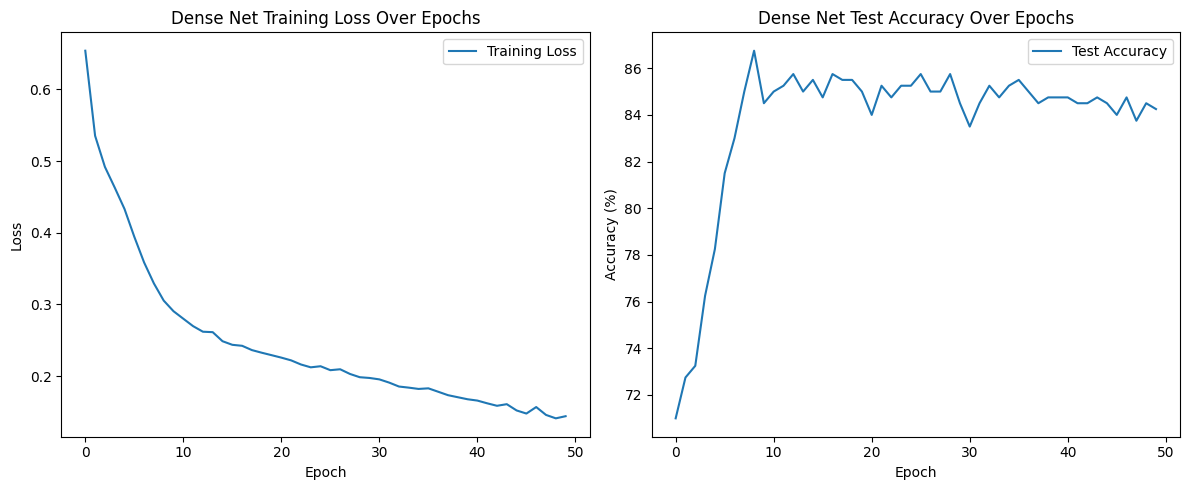

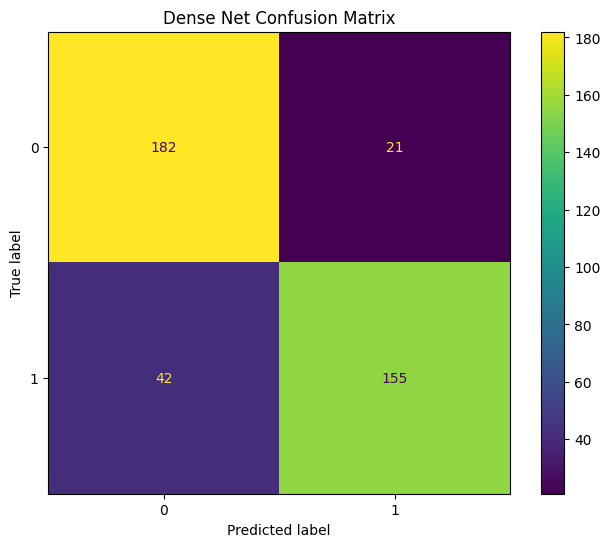

In [57]:
# Plot the loss and accuracy for Dense Network
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(dense_train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Dense Net Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(dense_test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Dense Net Test Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Dense Net Confusion Matrix')
plt.show()